# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### Business Understanding Summary

Used Car Dealership is a highly saturated market with a lot of competition. In order to be successful, the business needs to maintain an inventory of good-quality cars and adequate pricing. Determining the right price is one of the main strategic decisions, as setting it too high may detract customers, and setting it too low could negatively impact profit margins. In this analysis, I will use ML and AI models (such as Linear, Ridge, and Lasso regression models) where the target variable is the used car price, and the independent variables include various car attributes such as manufacturer, year, odometer reading, vehicle condition, fuel type, transmission type, etc. Regression model coefficients will help me understand the relationship between various features and their impact on the price, which will allow me to provide recommendations on how to maximize the profit for used car dealerships. 



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Understanding steps:
1) Load and pre-view the data summary and descriptive statistics
2) Identify missing values
3) Determine the number of records where the value is equal to 0
4) Identify outliers
5) Review unique values for specific columns
6) Identify duplicates
7) Create plots to visualize the data

In [42]:
import pandas as pd

In [43]:
# Upload data file
car = pd.read_csv('data/vehicles.csv')

In [358]:
# Show table
car

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [44]:
# Show data summary
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [361]:
# Show descriptive statistics
car.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [362]:
# Show descriptive statistics for 'objects'
car.describe(include = ['object'])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [106]:
# Identify the number of missing values for each column
missing = car.isnull().sum()

# Identify the percentage of missing values for each column
total_rows = car.shape[0]
missing_percentage = (missing / total_rows) * 100

# Show results
missing_table = pd.DataFrame({
    'Column': missing.index,
    'Missing': missing.values,
    'Percentage': missing_percentage.values
})

missing_table

,Column,Missing,Percentage
0,id,0,0.000000
1,region,0,0.000000
2,price,0,0.000000
3,year,1205,0.282281
4,manufacturer,17646,4.133714
5,model,5277,1.236179
6,condition,174104,40.785232
7,cylinders,177678,41.622470
8,fuel,3013,0.705819
9,odometer,4400,1.030735


In [99]:
# Identify number of records where the value is equal to 0
car.eq(0).sum()

id                  0
region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
VIN                 0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64

In [300]:
# Sort the data by 'price' in descending order and select the top 10
top_10 = car[['price', 'manufacturer', 'model', 'year']].sort_values(by='price', ascending=False).head(10)

# Show result
print(top_10)

             price   manufacturer                   model    year
318592  3736928711         toyota                  tundra  2007.0
356716  3736928711         toyota                 4runner  1999.0
257840  3024942282  mercedes-benz               benz s430  2000.0
91576   3024942282  mercedes-benz               benz e320  2000.0
37410   3009548743      chevrolet                     NaN  2021.0
184704  1410065407           jeep                wrangler  1989.0
153082  1234567890          volvo                     vnl  2006.0
29386   1111111111           ford  f350 super duty lariat  1999.0
37409   1111111111           jeep                     NaN  2020.0
122470   987654321      chevrolet                     NaN  1960.0


In [171]:
# Get unique values for celected column
unique_values_fuel = car['fuel'].unique()
unique_values_manufacturer = car['manufacturer'].unique()
unique_values_title_status = car['title_status'].unique()
unique_values_transmission = car['transmission'].unique()
unique_values_drive = car['drive'].unique()
unique_values_type = car['type'].unique()
unique_values_paint_color = car['paint_color'].unique()
unique_values_state = car['state'].unique()



print("Unique values in fuel:", unique_values_fuel)
print("Unique values in manufacturer:", unique_values_manufacturer)
print("Unique values in title_status:", unique_values_title_status)
print("Unique values in transmission:", unique_values_transmission)
print("Unique values in drive:", unique_values_drive)
print("Unique values in type:", unique_values_type)
print("Unique values in paint_color:", unique_values_paint_color)
print("Unique values in state:", unique_values_state)

Unique values in fuel: [nan 'gas' 'other' 'diesel' 'hybrid' 'electric']
Unique values in manufacturer: [nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin' 'land rover' 'morgan']
Unique values in title_status: [nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']
Unique values in transmission: [nan 'other' 'automatic' 'manual']
Unique values in drive: [nan 'rwd' '4wd' 'fwd']
Unique values in type: [nan 'pickup' 'truck' 'other' 'coupe' 'SUV' 'hatchback' 'mini-van' 'sedan'
 'offroad' 'bus' 'van' 'convertible' 'wagon']
Unique values in paint_color: [nan 'white' 'blue' 'red' 'black' 'silver' 'grey' 'brown' 'yellow'
 'orange' 'green' 'custom' 'purple']

In [169]:
# Show the number of unique values for each column

car.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [140]:
# Find the VIN numbers that appear more than once
vin_counts = car['VIN'].value_counts()
duplicate_vins = vin_counts[vin_counts > 1].index

# Filter the data to show only the rows with duplicate VINs
car[car['VIN'].isin(duplicate_vins)]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
27,7316814884,auburn,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,al
28,7316814758,auburn,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,NaN,NaN,pickup,blue,al
29,7316814989,auburn,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,NaN,NaN,pickup,red,al
30,7316743432,auburn,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,NaN,NaN,pickup,red,al
32,7316343444,auburn,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,1GT220CG8CZ231238,4wd,NaN,pickup,black,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [142]:
# Show rows with a specific VIN number

car[car['VIN'] == '58ABK1GG4JU103853']



,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
33279,7316676000,los angeles,28590,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,ca
40961,7301754664,monterey bay,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,ca
60651,7316866171,SF bay area,28590,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,ca
75367,7301762706,colorado springs,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,co
101864,7301724383,lakeland,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,fl
275182,7316702403,new york city,28590,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,ny
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


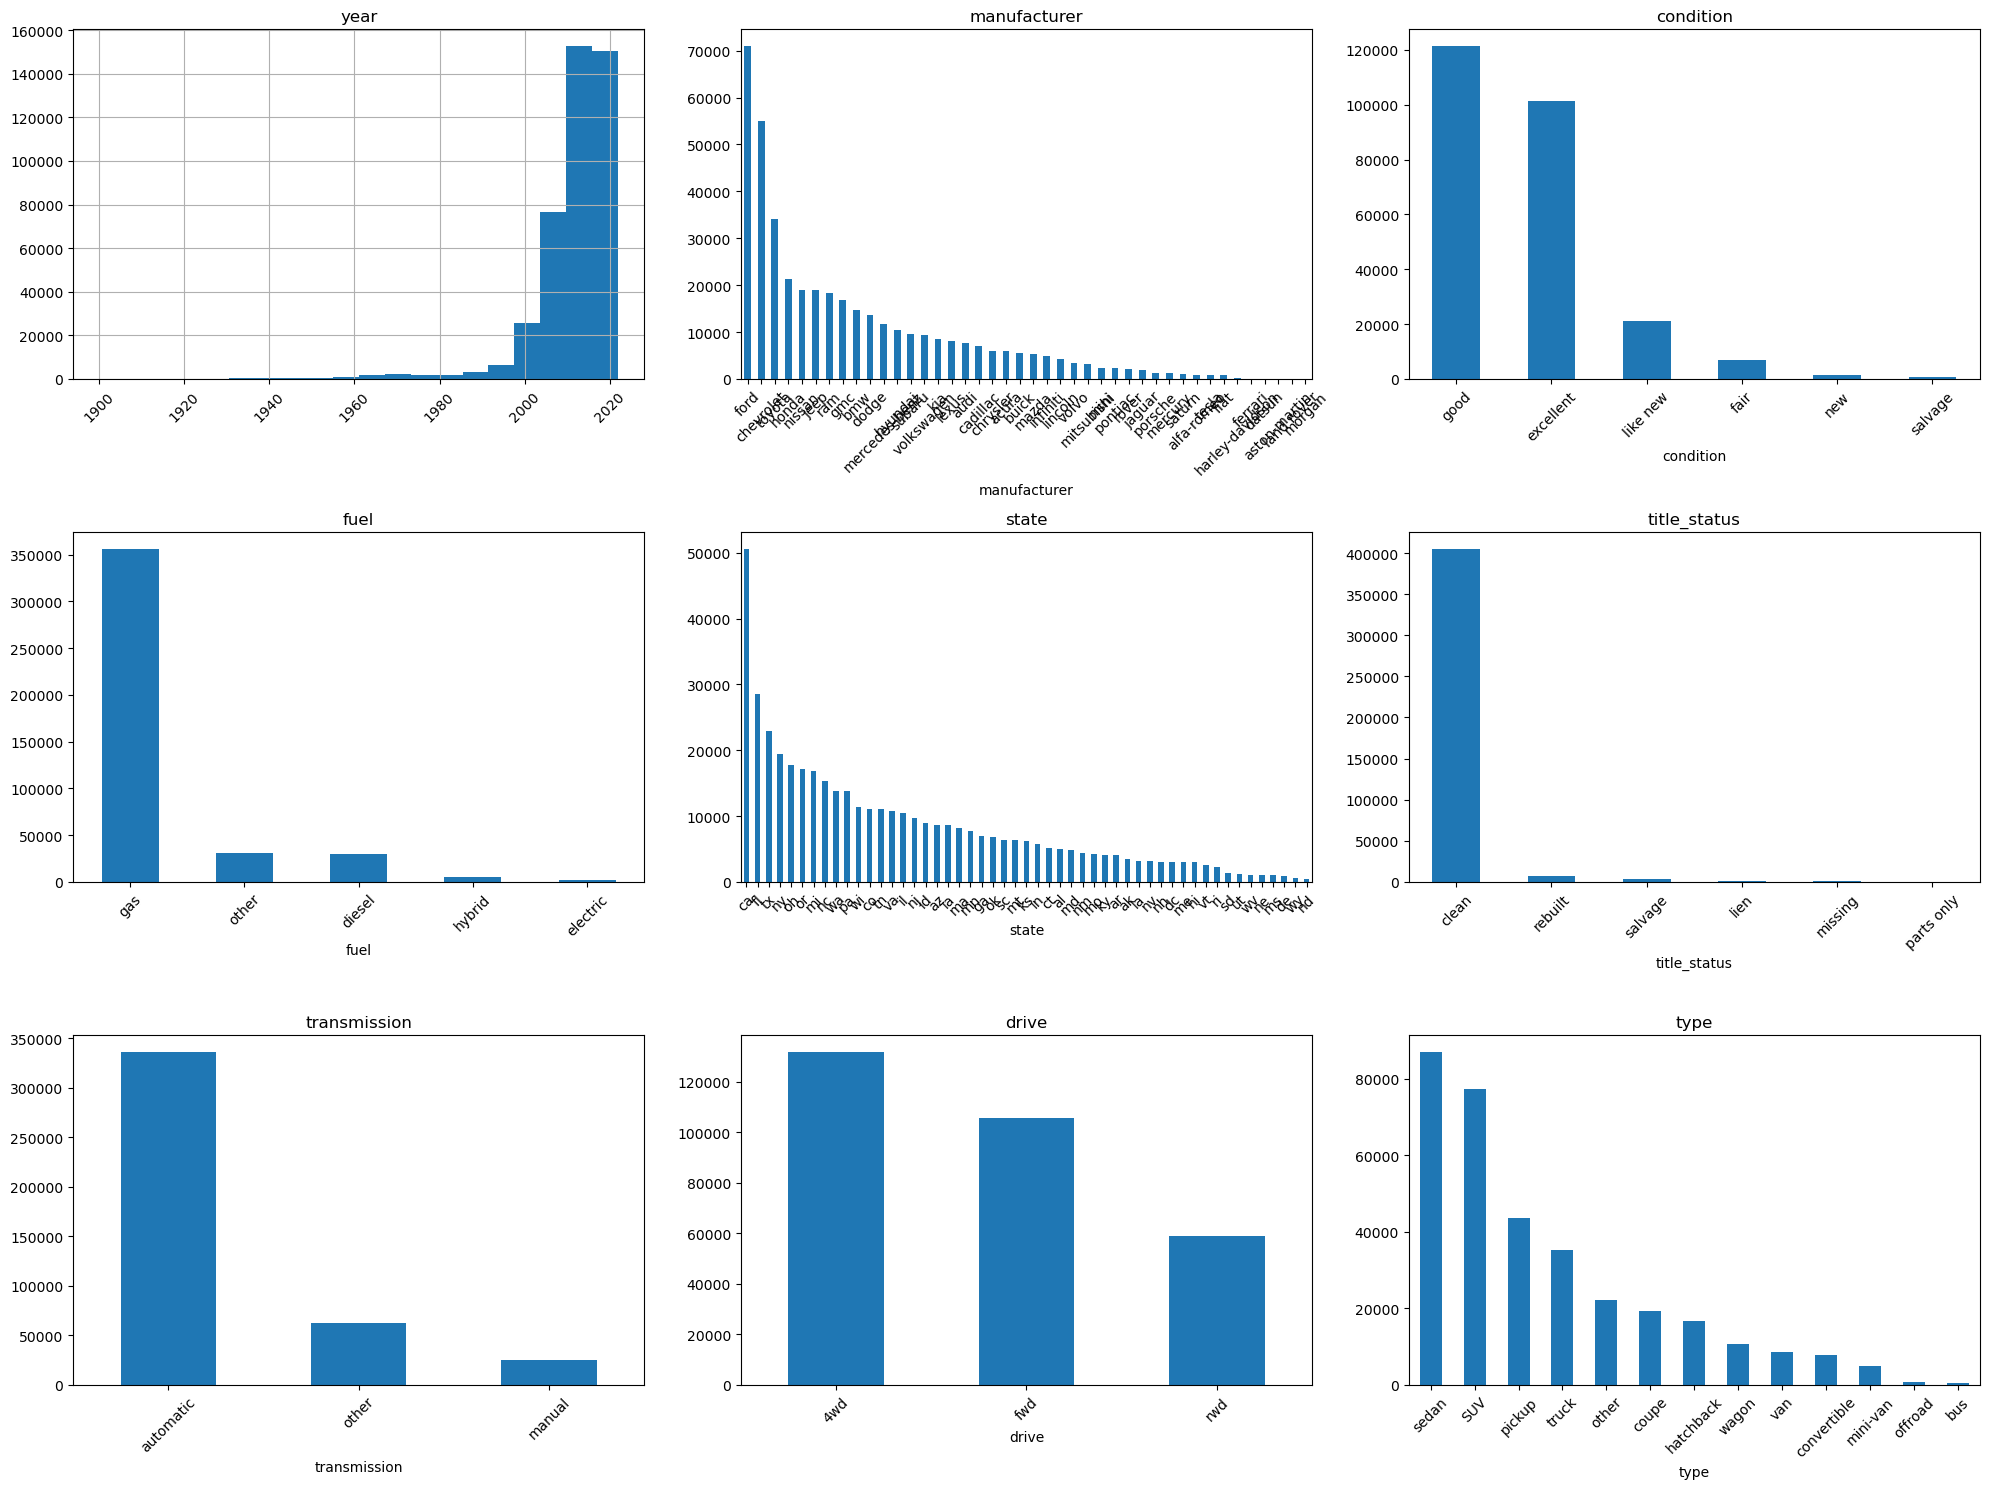

In [364]:
# Create graphs for specified columns

columns = ['year', 'manufacturer', 'condition', 'fuel', 'state', 'title_status', 'transmission', 'drive', 'type']

plt.figure(figsize=(20, 15))

# Loop through the columns and create a subplot for each histogram
for i, column in enumerate(columns, start=1):
    plt.subplot(3, 3, i)
    if car[column].dtype == 'object':
        car[column].value_counts().plot(kind='bar')
    else:
        car[column].hist(bins=20)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [355]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import numpy as np

In [303]:
# Remove duplicates based on 'VIN' column, as these are multiple postings of the same vehicle
car_deduped = car.drop_duplicates(subset='VIN', keep='first')

# Reset the index, and drop the old index column
car_deduped = car_deduped.reset_index(drop=True)

# Show the result
car_deduped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118247 entries, 0 to 118246
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            118247 non-null  int64  
 1   region        118247 non-null  object 
 2   price         118247 non-null  int64  
 3   year          117653 non-null  float64
 4   manufacturer  115179 non-null  object 
 5   model         117542 non-null  object 
 6   condition     61082 non-null   object 
 7   cylinders     70266 non-null   object 
 8   fuel          116608 non-null  object 
 9   odometer      116671 non-null  float64
 10  title_status  114608 non-null  object 
 11  transmission  117010 non-null  object 
 12  VIN           118246 non-null  object 
 13  drive         90898 non-null   object 
 14  size          30310 non-null   object 
 15  type          102062 non-null  object 
 16  paint_color   87564 non-null   object 
 17  state         118247 non-null  object 
dtypes: f

In [304]:
# Identify the number of missing values for each column in deduped data set
missing1 = car_deduped.isnull().sum()

# Identify the percentage of missing values for each column
total_rows1 = car_deduped.shape[0]
missing_percentage1 = (missing1 / total_rows1) * 100

# Show results
missing_table1 = pd.DataFrame({
    'Column': missing1.index,
    'Missing': missing1.values,
    'Percentage': missing_percentage1.values
})

missing_table1

,Column,Missing,Percentage
0,id,0,0.000000
1,region,0,0.000000
2,price,0,0.000000
3,year,594,0.502338
4,manufacturer,3068,2.594569
5,model,705,0.596210
6,condition,57165,48.343721
7,cylinders,47981,40.576928
8,fuel,1639,1.386082
9,odometer,1576,1.332803


In [305]:
# Drop not usefull columns such as 'id', 'VIN'
# Drop columns where more than 45% of data is missing, such as 'size', 'cylinders'
# Drop columns that have too many unique values for one-hot encoding, such as 'region', 'model'
# Drop 'paint_color' column as it has minimal or no impact on pirce from my personal experiance

car1 = car_deduped.drop(columns = ['id', 'VIN', 'size','cylinders', 'region', 'model', 'paint_color'])

car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118247 entries, 0 to 118246
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         118247 non-null  int64  
 1   year          117653 non-null  float64
 2   manufacturer  115179 non-null  object 
 3   condition     61082 non-null   object 
 4   fuel          116608 non-null  object 
 5   odometer      116671 non-null  float64
 6   title_status  114608 non-null  object 
 7   transmission  117010 non-null  object 
 8   drive         90898 non-null   object 
 9   type          102062 non-null  object 
 10  state         118247 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 9.9+ MB


In [306]:
# delete rows where manufacturer value is missing as imputing would not provide a good solution 
car1 = car1.dropna(subset=['manufacturer'])

# Reset the index, and drop the old index column
car1 = car1.reset_index(drop=True)

car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115179 entries, 0 to 115178
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         115179 non-null  int64  
 1   year          115176 non-null  float64
 2   manufacturer  115179 non-null  object 
 3   condition     59433 non-null   object 
 4   fuel          113688 non-null  object 
 5   odometer      113654 non-null  float64
 6   title_status  111731 non-null  object 
 7   transmission  114014 non-null  object 
 8   drive         88774 non-null   object 
 9   type          99609 non-null   object 
 10  state         115179 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 9.7+ MB


In [307]:
# Impute numerical and categorical columns to replace missing vales

numerical_columns = car1.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = car1.select_dtypes(include=['object']).columns


imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')


for col in numerical_columns:
    car1[col] = pd.DataFrame(imputer_num.fit_transform(car1[[col]]))


for col in categorical_columns:
    car1[col] = pd.DataFrame(imputer_cat.fit_transform(car1[[col]]))

In [308]:
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115179 entries, 0 to 115178
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         115179 non-null  float64
 1   year          115179 non-null  float64
 2   manufacturer  115179 non-null  object 
 3   condition     115179 non-null  object 
 4   fuel          115179 non-null  object 
 5   odometer      115179 non-null  float64
 6   title_status  115179 non-null  object 
 7   transmission  115179 non-null  object 
 8   drive         115179 non-null  object 
 9   type          115179 non-null  object 
 10  state         115179 non-null  object 
dtypes: float64(3), object(8)
memory usage: 9.7+ MB


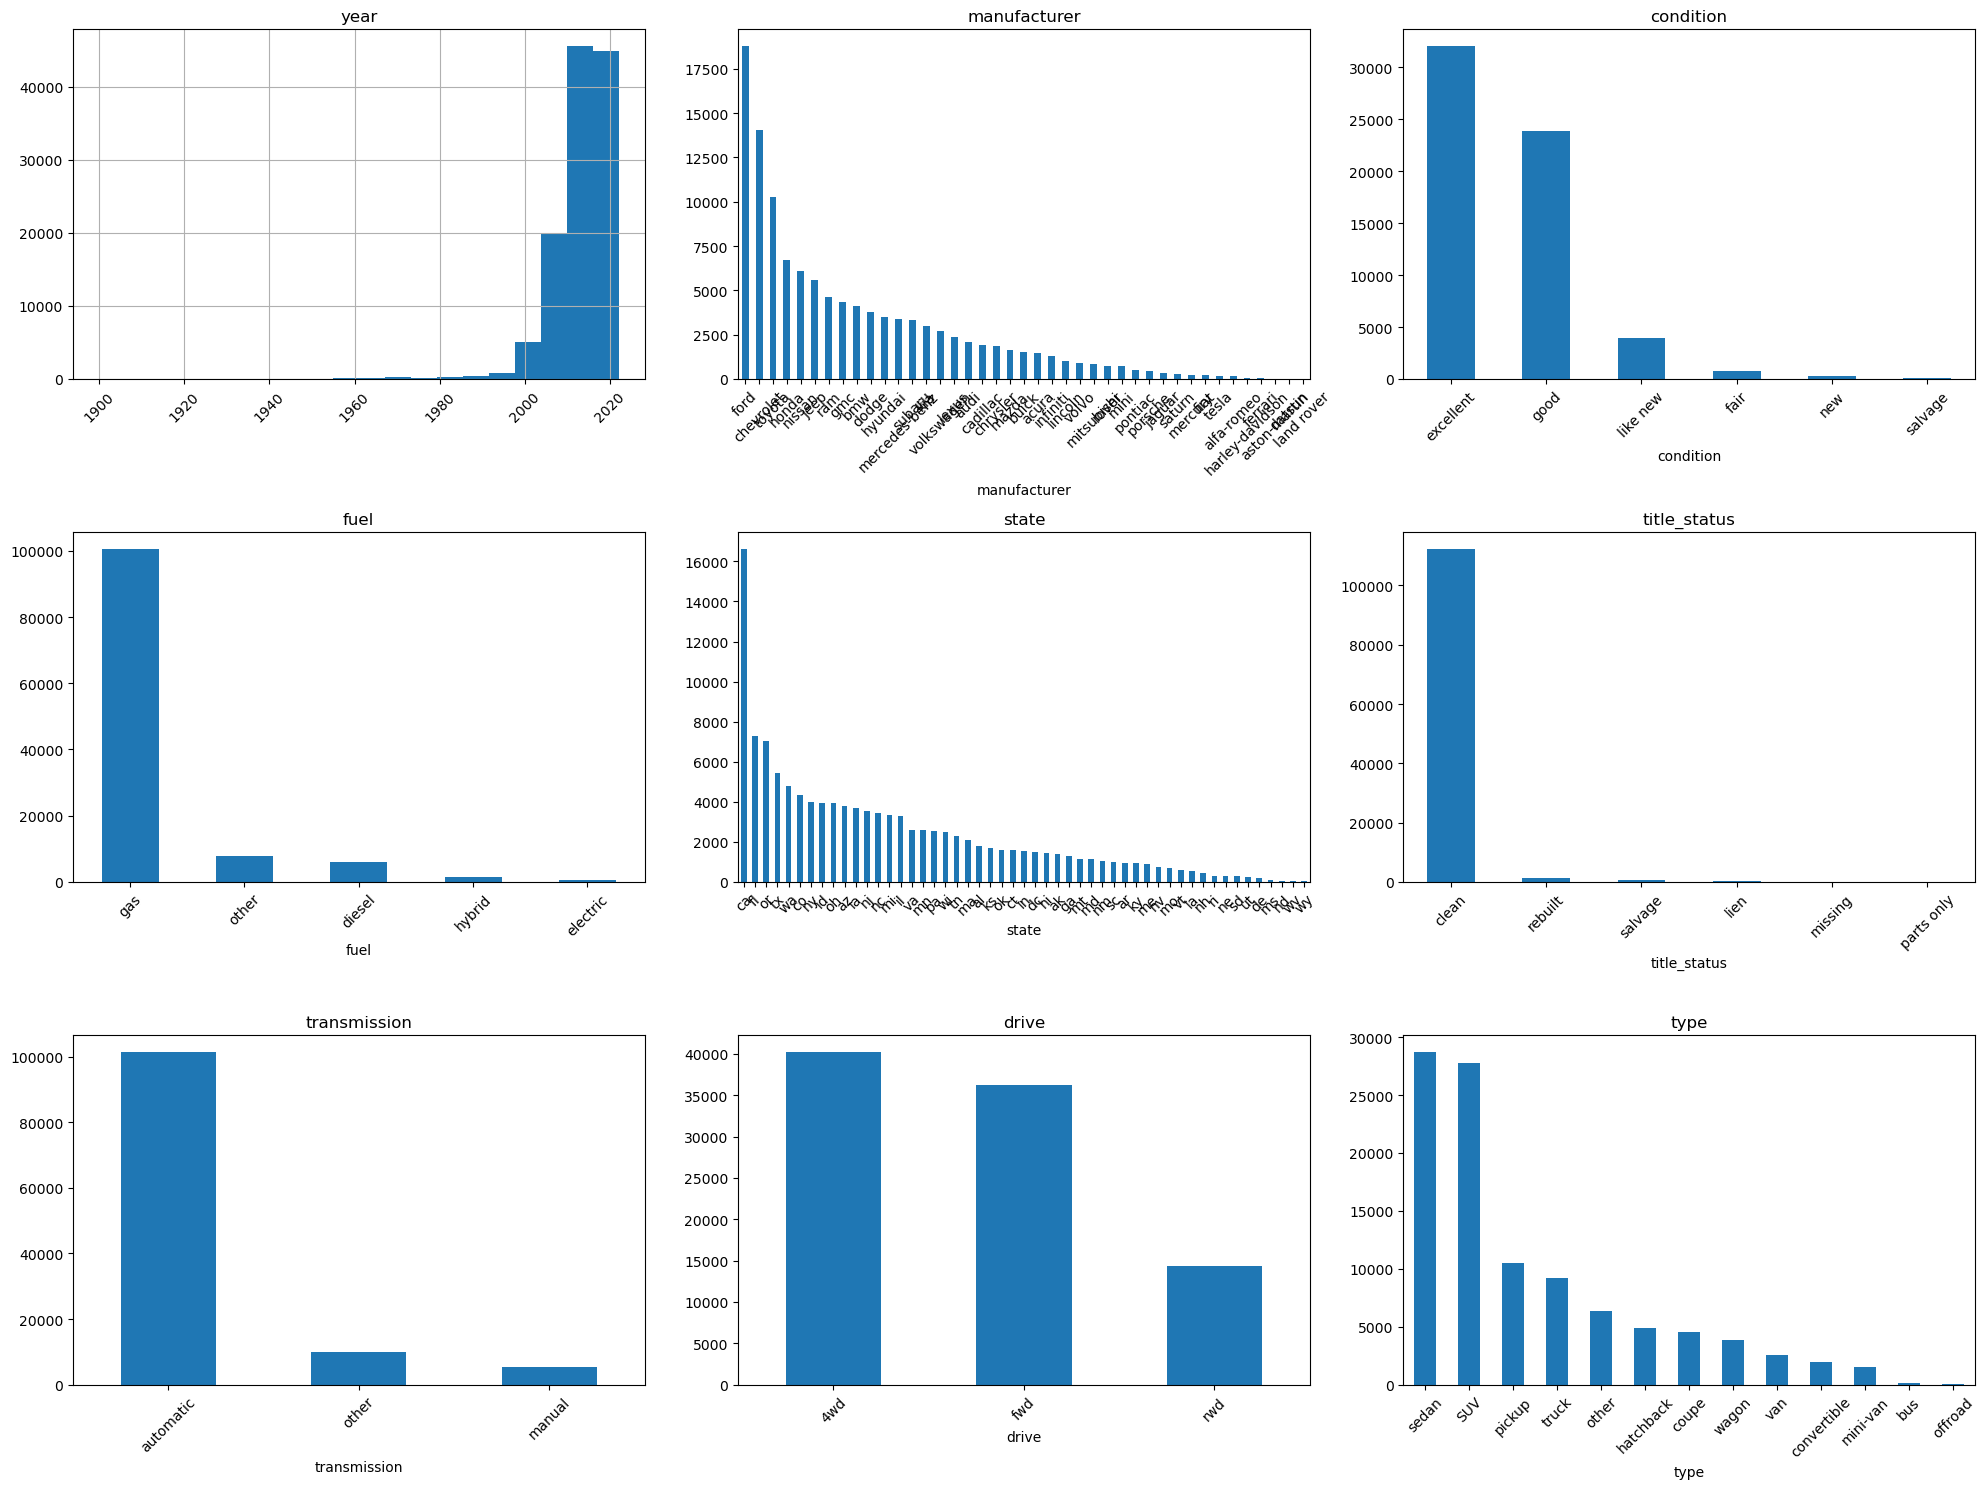

In [327]:
# Create graphs for specified columns

columns = ['year', 'manufacturer', 'condition', 'fuel', 'state', 'title_status', 'transmission', 'drive', 'type']

plt.figure(figsize=(20, 15))

# Loop through the columns and create a subplot for each histogram
for i, column in enumerate(columns, start=1):
    plt.subplot(3, 3, i)
    if car_deduped[column].dtype == 'object':  
        car_deduped[column].value_counts().plot(kind='bar')
    else:
        car_deduped[column].hist(bins=20)
    plt.title(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [309]:
# Convert object data types to srting and float to integer
car1 = car1.convert_dtypes()
car1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115179 entries, 0 to 115178
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         115179 non-null  Int64 
 1   year          115179 non-null  Int64 
 2   manufacturer  115179 non-null  string
 3   condition     115179 non-null  string
 4   fuel          115179 non-null  string
 5   odometer      115179 non-null  Int64 
 6   title_status  115179 non-null  string
 7   transmission  115179 non-null  string
 8   drive         115179 non-null  string
 9   type          115179 non-null  string
 10  state         115179 non-null  string
dtypes: Int64(3), string(8)
memory usage: 10.0 MB


In [310]:
# Remove rows where price is above $500,000 as this is an outlier or incorrect price

car2 = car1[car1['price'] <= 500000]
car2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115175 entries, 0 to 115178
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         115175 non-null  Int64 
 1   year          115175 non-null  Int64 
 2   manufacturer  115175 non-null  string
 3   condition     115175 non-null  string
 4   fuel          115175 non-null  string
 5   odometer      115175 non-null  Int64 
 6   title_status  115175 non-null  string
 7   transmission  115175 non-null  string
 8   drive         115175 non-null  string
 9   type          115175 non-null  string
 10  state         115175 non-null  string
dtypes: Int64(3), string(8)
memory usage: 10.9 MB


In [311]:
# Sort the data by 'price' in descending order and select the top 10
top = car2[['price', 'manufacturer', 'year']].sort_values(by='price', ascending=False).head(10)

# Show result
print(top)

         price manufacturer  year
98880   449500      ferrari  2019
15767   347999      ferrari  2020
29812   304995      porsche  2021
39962   289995      ferrari  2016
40421   289900      ferrari  2018
103260  244999      porsche  2019
5862    239995      ferrari  2017
91760   239900      porsche  2018
3257    229500      ferrari  2018
39503   225995      porsche  2016


In [312]:
# Remove rows where price is below $500 as this is an outlier, monthly lease price, or missing data (if zero)

car3 = car2[car2['price'] >= 500]
car3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99619 entries, 0 to 115178
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         99619 non-null  Int64 
 1   year          99619 non-null  Int64 
 2   manufacturer  99619 non-null  string
 3   condition     99619 non-null  string
 4   fuel          99619 non-null  string
 5   odometer      99619 non-null  Int64 
 6   title_status  99619 non-null  string
 7   transmission  99619 non-null  string
 8   drive         99619 non-null  string
 9   type          99619 non-null  string
 10  state         99619 non-null  string
dtypes: Int64(3), string(8)
memory usage: 9.4 MB


In [313]:
# Sort the data by 'price' in descending order and select the last 10
t = car3[['price', 'manufacturer', 'year', 'odometer']].sort_values(by='price', ascending=False).tail(10)
t

,price,manufacturer,year,odometer
10405,500,chevrolet,2010,162978
42012,500,toyota,2007,209810
61404,500,dodge,2012,87201
82659,500,chrysler,2005,145000
104214,500,pontiac,1996,76946
61411,500,chevrolet,2016,76558
97913,500,ford,1997,10000
56295,500,ford,2005,133745
82657,500,chevrolet,2004,147000
92640,500,honda,2018,22151


In [315]:
# Remove rows where odometer value is below 1 as this is incorrect or missing data (if zero)

car4 = car3[car3['odometer'] >= 1]

# Reset the index, and drop the old index column
car4 = car4.reset_index(drop=True)

car4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99232 entries, 0 to 99231
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         99232 non-null  Int64 
 1   year          99232 non-null  Int64 
 2   manufacturer  99232 non-null  string
 3   condition     99232 non-null  string
 4   fuel          99232 non-null  string
 5   odometer      99232 non-null  Int64 
 6   title_status  99232 non-null  string
 7   transmission  99232 non-null  string
 8   drive         99232 non-null  string
 9   type          99232 non-null  string
 10  state         99232 non-null  string
dtypes: Int64(3), string(8)
memory usage: 8.6 MB


In [316]:
# Convert all values in 'title_status' to 'salvage' unless they have 'clean' title

car4['title_status'] = car4['title_status'].apply(lambda x: x if x == 'clean' else 'salvage')

car4['title_status'].unique()

array(['clean', 'salvage'], dtype=object)

In [317]:
# Convert 'title_status' column to binary and delete original column

car4['title_status_binary'] = car4['title_status'].map({'clean': 1, 'salvage': 0})

car5 = car4.drop(columns=['title_status'])

car5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99232 entries, 0 to 99231
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   price                99232 non-null  Int64 
 1   year                 99232 non-null  Int64 
 2   manufacturer         99232 non-null  string
 3   condition            99232 non-null  string
 4   fuel                 99232 non-null  string
 5   odometer             99232 non-null  Int64 
 6   transmission         99232 non-null  string
 7   drive                99232 non-null  string
 8   type                 99232 non-null  string
 9   state                99232 non-null  string
 10  title_status_binary  99232 non-null  int64 
dtypes: Int64(3), int64(1), string(7)
memory usage: 8.6 MB


In [318]:
# Replace 'manual' and 'other' values in the transmission column with 'non_automatic'

car5['transmission'] = car5['transmission'].apply(lambda x: x if x == 'automatic' else 'non_automatic')

car5['transmission'].unique()

array(['non_automatic', 'automatic'], dtype=object)

In [319]:
# Convert 'transmission' column to binary and delete original column

car5['transmission_binary'] = car5['transmission'].map({'automatic': 1, 'non_automatic': 0})

car6 = car5.drop(columns=['transmission'])


car6

,price,year,manufacturer,condition,fuel,odometer,drive,type,state,title_status_binary,transmission_binary
0,33590,2014,gmc,good,gas,57923,4wd,pickup,al,1,0
1,22590,2010,chevrolet,good,gas,71229,4wd,pickup,al,1,0
2,39590,2020,chevrolet,good,gas,19160,4wd,pickup,al,1,0
3,30990,2017,toyota,good,gas,41124,4wd,pickup,al,1,0
4,27990,2012,gmc,good,gas,68696,4wd,pickup,al,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99227,5200,2005,subaru,good,gas,172511,4wd,sedan,wy,1,1
99228,4500,2006,chrysler,excellent,gas,163837,4wd,wagon,wy,1,1
99229,2500,2005,honda,good,gas,185000,fwd,sedan,wy,1,0
99230,17950,2004,ford,excellent,diesel,186000,4wd,other,wy,1,1


In [324]:
# Set ordinal mapping for the 'condition' column

mapping = {
    'new': 6,
    'like new': 5,
    'excellent': 4,
    'good': 3,
    'fair': 2,
    'salvage': 1
}

# Use the ordinal encoding on the 'condition' column
car6['condition_encoded'] = car6['condition'].map(mapping)

#Delete original column
car6 = car6.drop(columns=['condition'])
car6

,price,year,manufacturer,fuel,odometer,drive,type,state,title_status_binary,transmission_binary,condition_encoded
0,33590,2014,gmc,gas,57923,4wd,pickup,al,1,0,3
1,22590,2010,chevrolet,gas,71229,4wd,pickup,al,1,0,3
2,39590,2020,chevrolet,gas,19160,4wd,pickup,al,1,0,3
3,30990,2017,toyota,gas,41124,4wd,pickup,al,1,0,3
4,27990,2012,gmc,gas,68696,4wd,pickup,al,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...
99227,5200,2005,subaru,gas,172511,4wd,sedan,wy,1,1,3
99228,4500,2006,chrysler,gas,163837,4wd,wagon,wy,1,1,4
99229,2500,2005,honda,gas,185000,fwd,sedan,wy,1,0,3
99230,17950,2004,ford,diesel,186000,4wd,other,wy,1,1,4


In [325]:
# Apply one-hot encoding to columns 'manufacturer', 'fuel', 'drive', 'type', 'state'

car7 = pd.get_dummies(car6, columns=['manufacturer', 'fuel', 'drive', 'type', 'state'])
car7 = car7.astype(int)
car7

,price,year,odometer,title_status_binary,transmission_binary,condition_encoded,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,33590,2014,57923,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,22590,2010,71229,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,39590,2020,19160,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30990,2017,41124,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,27990,2012,68696,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99227,5200,2005,172511,1,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99228,4500,2006,163837,1,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99229,2500,2005,185000,1,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99230,17950,2004,186000,1,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [331]:
# Split the data into training and testing

X = car7.drop('price', axis=1)
y = car7['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [366]:
# Linear Regression Model

Lr = LinearRegression()
Lr.fit(X_train, y_train)
Lr_train_preds = Lr.predict(X_train)
Lr_test_preds = Lr.predict(X_test)
Lr_train_mse = mean_squared_error(Lr_train_preds, y_train)
Lr_test_mse = mean_squared_error(Lr_test_preds, y_test)


Lr_model_coefs = Lr.coef_


print(f'Lr Train MSE: {Lr_train_mse}')
print(f'Lr Test MSE: {Lr_test_mse}')
print(f'Lr Model Score: {Lr.score(X_test, y_test)}')
Lr_df = pd.DataFrame([Lr.coef_], columns = X_train.columns)
Lr_df

Lr Train MSE: 107881976.31557225
Lr Test MSE: 109640838.86399864
Lr Model Score: 0.5008141667388246


,year,odometer,title_status_binary,transmission_binary,condition_encoded,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,772.486844,-0.024628,3794.523071,-3530.232023,1135.608608,-3203.267238,-113.288634,42671.673723,-3092.020662,-4254.113344,-4648.479168,-406.851407,-3627.401079,-7668.216453,17219.564115,-5265.392102,93007.090463,-13063.769188,-3773.680805,-736.655998,-12236.041118,-6511.2242,-8680.577549,-4006.541118,-2078.793584,-3093.61209,-8448.916862,-8864.116519,-917.770889,-1945.138222,-7814.229329,-1474.760484,-5858.708422,-8604.900794,-10551.726247,-7947.93303,-3059.619157,15512.767498,-2121.949727,4632.435569,-8695.798556,-8702.628912,13940.024658,-3727.098014,-7786.627673,-4001.707456,10146.939999,-3042.085966,-2941.272436,-3571.191756,-592.389845,2154.104623,-3629.217497,1475.112873,-2940.329467,-892.869884,2628.915556,3406.093983,-4757.895126,-1490.374914,3276.881874,-119.877608,3686.418486,-3004.686179,3591.53271,49.00002,-3432.80945,4320.234795,1918.368881,1023.611942,1129.356564,983.034448,545.351122,-2156.2786,-1643.688794,-1043.146353,-207.432132,-774.209126,6266.789899,-954.836927,2091.814243,-1450.833993,-103.415799,-1856.873035,-1051.515696,2786.283417,-1519.105192,-934.731548,-273.273283,-1850.619531,-1040.943209,439.769534,1528.168681,-523.62863,155.273075,-2829.512148,1727.830373,-1890.667885,-1320.44987,1107.367329,-615.623437,-1038.161399,-2567.186922,26.391395,338.414791,-1304.273081,-2017.973953,1459.683226,291.482926,320.556482,2189.52628,5182.536656,-2812.884738,-1275.112318,3335.697691,-1449.520724,-1306.495676,-1355.14975


In [403]:
# Ridge Model

ridge_pipe = Pipeline([('scaler', StandardScaler()),('model', Ridge())])
ridge_pipe.fit(X_train, y_train)
ridge_train_preds = ridge_pipe.predict(X_train)
ridge_test_preds = ridge_pipe.predict(X_test)
ridge_train_mse = mean_squared_error(ridge_train_preds, y_train)
ridge_test_mse = mean_squared_error(ridge_test_preds, y_test)


ridge_model_coefs = ridge_pipe.named_steps['model'].coef_


print(f'Ridge Train MSE: {ridge_train_mse}')
print(f'Ridge Test MSE: {ridge_test_mse}')
print(f'Ridge Model Score: {ridge_pipe.score(X_test, y_test)}')
ridge_df = pd.DataFrame([ridge_pipe.named_steps["model"].coef_], columns = X_train.columns)
ridge_df

Ridge Train MSE: 107881976.32563344
Ridge Test MSE: 109640982.96640357
Ridge Model Score: 0.5008135106522803


,year,odometer,title_status_binary,transmission_binary,condition_encoded,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,5137.742684,-2523.585657,541.17979,-1227.708027,578.17238,124.319722,158.851042,487.226796,168.036852,13.267976,-37.032432,502.160566,228.389564,-418.42951,208.932298,-164.737529,1513.489639,-387.966959,203.678263,682.987786,-166.535989,-513.981166,-746.345823,33.52771,123.066601,260.945107,-643.331351,-23.528295,491.656706,224.820964,-406.794405,484.937996,-71.463017,-340.787606,-516.133725,-811.215548,86.591603,1289.909769,429.99435,726.645249,-209.858739,-755.581352,799.86453,170.214143,-527.962179,28.850723,2132.144919,-216.002691,-1040.799371,-433.811234,-185.253114,1145.716468,-1604.925891,534.383673,-793.358101,3.868709,477.262488,848.864429,-749.372575,-50.122946,113.538843,211.1299,1383.053478,-941.388233,1229.934854,164.973211,-426.419386,483.050291,230.102747,71.562556,186.239141,294.28562,82.980198,-277.538868,-197.374362,-52.17688,-79.769509,-93.912203,651.998991,-189.621212,361.098791,-259.877049,-26.178472,-238.436157,-112.570514,188.788771,-215.868354,-103.588887,-31.860958,-329.084881,-173.796222,25.260948,42.339887,-64.217924,6.092242,-74.006665,85.070342,-130.913682,-255.658349,80.709938,-57.495667,-198.917095,-490.270411,-9.619851,47.066084,-209.733975,-109.664766,128.922998,9.221714,29.439748,440.899339,243.967963,-396.846339,-100.593491,618.940867,-235.81735,-32.143661,-31.445774


In [376]:
# Lasso Model

lasso_pipe = Pipeline([('scaler', StandardScaler()),('model', Lasso(max_iter=10000))])
lasso_pipe.fit(X_train, y_train)
lasso_train_preds = lasso_pipe.predict(X_train)
lasso_test_preds = lasso_pipe.predict(X_test)
lasso_train_mse = mean_squared_error(lasso_train_preds, y_train)
lasso_test_mse = mean_squared_error(lasso_test_preds, y_test)


lasso_model_coefs = lasso_pipe.named_steps['model'].coef_


print(f'Lasso Train MSE: {lasso_train_mse}')
print(f'Lasso Test MSE: {lasso_test_mse}')
print(f'Lasso Model Score: {lasso_pipe.score(X_test, y_test)}')
lasso_df = pd.DataFrame([lasso_pipe.named_steps["model"].coef_], columns = X_train.columns)
lasso_df

Lasso Train MSE: 107882081.70460491
Lasso Test MSE: 109645721.19568661
Lasso Model Score: 0.5007919378792394


,year,odometer,title_status_binary,transmission_binary,condition_encoded,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,5137.07367,-2523.256459,540.388506,-1226.634213,576.608815,62.097902,137.025984,480.590581,91.796681,-88.757671,-99.522939,430.173242,46.677031,-486.473944,202.565596,-260.478455,1504.002207,-411.363755,-0.0,576.848773,-177.186182,-643.04592,-840.114125,-23.65358,91.821097,142.66688,-728.572479,-25.444339,410.806318,171.489317,-470.218456,389.982763,-96.455448,-383.574186,-560.847835,-934.22706,47.635126,1253.107616,321.795213,680.804422,-235.514687,-850.305573,773.582842,11.939993,-611.22792,-19.524833,2799.614439,-4.724618,-0.0,-71.581726,562.931357,334.220802,-2362.857461,0.0,-609.443797,12.644584,532.036331,929.841375,-661.436908,-0.0,124.000882,307.211247,1508.799563,-731.414937,1343.786607,227.842418,-348.151935,519.309179,270.510169,96.100928,244.813973,403.230833,144.586314,-237.045837,-160.113966,-36.733058,-0.0,-58.827036,685.377285,-131.507069,419.337305,-205.431883,11.287695,-198.426266,-80.375115,210.690805,-172.195348,-70.788898,-4.307401,-274.001025,-124.338456,49.492304,51.047397,-30.722551,55.657294,-64.881192,101.202363,-108.873783,-197.202303,105.989634,-31.202934,-142.301202,-430.38134,23.849402,114.626458,-161.200287,-92.114749,158.936498,25.282819,75.085212,508.755648,258.568428,-352.164127,-76.398341,680.162121,-186.168513,-23.848679,-23.543489


In [397]:
# Ridge Model with GridSearch for best alpha

ridge_pipe = Pipeline([('scaler', StandardScaler()),('model', Ridge())])

param_grid = {'model__alpha': np.logspace(-4, 4, 20)}

grid_search = GridSearchCV(ridge_pipe, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

ridge_train_preds = best_model.predict(X_train)
ridge_test_preds = best_model.predict(X_test)

ridge_train_mse_alpha = mean_squared_error(y_train, ridge_train_preds)
ridge_test_mse_alpha = mean_squared_error(y_test, ridge_test_preds)
ridge_model_score_alpha = best_model.score(X_test, y_test)

ridge_train_mse_alpha, ridge_test_mse_alpha, ridge_model_score_alpha, grid_search.best_params_

(108012190.21246636,
 110302406.63589565,
 0.49780210241229395,
 {'model__alpha': 3792.690190732246})

In [357]:
# Ridge Model with SFS using Lasso

sfs_pipe = Pipeline([('scaler', StandardScaler()), 
                     ('selector', SequentialFeatureSelector(estimator=Lasso(), n_features_to_select=10)),
                      ('model', Ridge())])
sfs_pipe.fit(X_train, y_train)
sfs_train_preds = sfs_pipe.predict(X_train)
sfs_test_preds = sfs_pipe.predict(X_test)
sfs_train_mse = mean_squared_error(sfs_train_preds, y_train)
sfs_test_mse = mean_squared_error(sfs_test_preds, y_test)

sfs_model_coefs = sfs_pipe.named_steps['model'].coef_


print(f'sfs Train MSE: {sfs_train_mse}')
print(f'sfs Test MSE: {sfs_test_mse}')
print(f'sfs Model Score: {sfs_pipe.score(X_test, y_test)}')

sfs_df = pd.DataFrame([sfs_pipe.named_steps["model"].coef_], 
                      columns = X_train.columns[sfs_pipe.named_steps["selector"].get_support()])
sfs_df


sfs Train MSE: 119768664.77100457
sfs Test MSE: 120477058.0755452
sfs Model Score: 0.45147774089091175


,year,odometer,transmission_binary,manufacturer_ferrari,manufacturer_porsche,fuel_diesel,drive_fwd,type_coupe,type_pickup,type_truck
0,5220.905357,-2713.892717,-1154.551916,1554.137286,1360.013025,2974.27319,-3371.423812,1106.824162,2207.148848,1903.407444


In [370]:
# Identify all columns that contain 'state'
columns_with_state = [column for column in car7.columns if 'state' in column]

# Drop these columns from the DataFrame
car8 = car7.drop(columns=columns_with_state)

In [371]:
car8.head()

,price,year,odometer,title_status_binary,transmission_binary,condition_encoded,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon
0,33590,2014,57923,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,22590,2010,71229,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,39590,2020,19160,1,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,30990,2017,41124,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,27990,2012,68696,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [372]:
# Split the data into training and testing

X1 = car8.drop('price', axis=1)
y1 = car8['price']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.25, random_state=42)

In [374]:
# Linear Regression Model excluding state features

Lr1 = LinearRegression()
Lr1.fit(X_train1, y_train1)
Lr_train_preds1 = Lr1.predict(X_train1)
Lr_test_preds1 = Lr1.predict(X_test1)
Lr_train_mse1 = mean_squared_error(Lr_train_preds1, y_train1)
Lr_test_mse1 = mean_squared_error(Lr_test_preds1, y_test1)


Lr_model_coefs = Lr1.coef_


print(f'Lr Train MSE: {Lr_train_mse1}')
print(f'Lr Test MSE: {Lr_test_mse1}')
print(f'Lr Model Score: {Lr1.score(X_test1, y_test1)}')
Lr_df1 = pd.DataFrame([Lr1.coef_], 
                      columns = X_train1.columns)
Lr_df1

Lr Train MSE: 107881976.31557225
Lr Test MSE: 109640838.86399864
Lr Model Score: 0.5008141667388246


,year,odometer,title_status_binary,transmission_binary,condition_encoded,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,772.486844,-0.024628,3794.523071,-3530.232023,1135.608608,-3203.267238,-113.288634,42671.673723,-3092.020662,-4254.113344,-4648.479168,-406.851407,-3627.401079,-7668.216453,17219.564115,-5265.392102,93007.090463,-13063.769188,-3773.680805,-736.655998,-12236.041118,-6511.2242,-8680.577549,-4006.541118,-2078.793584,-3093.61209,-8448.916862,-8864.116519,-917.770889,-1945.138222,-7814.229329,-1474.760484,-5858.708422,-8604.900794,-10551.726247,-7947.93303,-3059.619157,15512.767498,-2121.949727,4632.435569,-8695.798556,-8702.628912,13940.024658,-3727.098014,-7786.627673,-4001.707456,10146.939999,-3042.085966,-2941.272436,-3571.191756,-592.389845,2154.104623,-3629.217497,1475.112873,-2940.329467,-892.869884,2628.915556,3406.093983,-4757.895126,-1490.374914,3276.881874,-119.877608,3686.418486,-3004.686179,3591.53271,49.00002,-3432.80945,4320.234795,1918.368881,1023.611942,1129.356564,983.034448,545.351122,-2156.2786,-1643.688794,-1043.146353,-207.432132,-774.209126,6266.789899,-954.836927,2091.814243,-1450.833993,-103.415799,-1856.873035,-1051.515696,2786.283417,-1519.105192,-934.731548,-273.273283,-1850.619531,-1040.943209,439.769534,1528.168681,-523.62863,155.273075,-2829.512148,1727.830373,-1890.667885,-1320.44987,1107.367329,-615.623437,-1038.161399,-2567.186922,26.391395,338.414791,-1304.273081,-2017.973953,1459.683226,291.482926,320.556482,2189.52628,5182.536656,-2812.884738,-1275.112318,3335.697691,-1449.520724,-1306.495676,-1355.14975


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Model Evaluation Summary

I created six different regression models: 1) Linear Regression, 2) Ridge, 3) Lasso, 4) Ridge with Grid Search for best alpha, 5) Ridge with Sequential Feature Selection using Lasso, 6) Linear Regression excluding state features.  The first Linear Regression model had the best Test MSE. To improve it, I also tried the Linear Regression model with Polynomial degree equal 2, but it gave me an error for having too many features; therefore, I did not take it into consideration. Additionally, I tried removing some of the features, such as states; however, this model performed slightly worse and was placed as the second-best model based on the Test MSE. Ridge model took third place. I tried to improve it by running a Grid Serch for best alpha, but, surprisingly, the resulting model had even lower Test MSE. It could be due to the specifics of how the data was split during cross-validation or peculiarities in the test set. Lasso model performed slightly worse than Ridge but better than Ridge with best alpha based on Test MSE; although, it had the highest R-score out of all the models. In an effort to make the best model, I created a Ridge model with Sequential Feature Selection using Lasso and 10 features to select. Ironically, this model performed the worst based on Test MSE, and was placed as number six.

The best Linear Regression Model had a Test MSE of 107,881,976. It is high due to the specificity of the data set. For example, I had to remove the "model" feature, as using one-hot encoding would significantly increase the dimensionality of the data set and make it unmanageable for regression modeling. Even though the Test MSE is high, I could still analyze the model's coefficients and provide valuable recommendations to car dealerships.


In [422]:
# Create summary tables for different models

models = {
    'Linear Regression': {'Train MSE': Lr_train_mse, 'Test MSE': Lr_test_mse, 'R-squared': Lr.score(X_test, y_test)},
    'Linear Regression excluding states': {'Train MSE': Lr_train_mse1, 'Test MSE': Lr_test_mse1, 'R-squared': Lr1.score(X_test1, y_test1)},     
    'Ridge': {'Train MSE': ridge_train_mse, 'Test MSE': ridge_test_mse, 'R-squared': ridge_pipe.score(X_test, y_test)},
    'Lasso': {'Train MSE': lasso_train_mse, 'Test MSE': lasso_test_mse, 'R-squared': lasso_pipe.score(X_test, y_test)},   
    'Ridge with best alpha': {'Train MSE': ridge_train_mse_alpha, 'Test MSE': ridge_test_mse_alpha, 'R-squared': ridge_model_score_alpha},
    'Ridge Model with SFS using Lasso': {'Train MSE': sfs_train_mse, 'Test MSE': sfs_test_mse, 'R-squared': sfs_pipe.score(X_test, y_test)},
   }

models_df = pd.DataFrame(models)

models_df = models_df.T

models_df

,Train MSE,Test MSE,R-squared
Linear Regression,1.078842e+08,1.096292e+08,0.500814
Linear Regression excluding states,1.078820e+08,1.096408e+08,0.500814
Ridge,1.078820e+08,1.096410e+08,0.500814
Lasso,1.078821e+08,1.096457e+08,0.500792
Ridge with best alpha,1.080122e+08,1.103024e+08,0.497802
Ridge Model with SFS using Lasso,1.197687e+08,1.204771e+08,0.451478


In [424]:
Lr_df = pd.DataFrame([Lr.coef_], columns = X_train.columns)
Lr_df

,year,odometer,title_status_binary,transmission_binary,condition_encoded,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,manufacturer_dodge,manufacturer_ferrari,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_harley-davidson,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes-benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,drive_4wd,drive_fwd,drive_rwd,type_SUV,type_bus,type_convertible,type_coupe,type_hatchback,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,772.486844,-0.024628,3794.523071,-3530.232023,1135.608608,-3203.267238,-113.288634,42671.673723,-3092.020662,-4254.113344,-4648.479168,-406.851407,-3627.401079,-7668.216453,17219.564115,-5265.392102,93007.090463,-13063.769188,-3773.680805,-736.655998,-12236.041118,-6511.2242,-8680.577549,-4006.541118,-2078.793584,-3093.61209,-8448.916862,-8864.116519,-917.770889,-1945.138222,-7814.229329,-1474.760484,-5858.708422,-8604.900794,-10551.726247,-7947.93303,-3059.619157,15512.767498,-2121.949727,4632.435569,-8695.798556,-8702.628912,13940.024658,-3727.098014,-7786.627673,-4001.707456,10146.939999,-3042.085966,-2941.272436,-3571.191756,-592.389845,2154.104623,-3629.217497,1475.112873,-2940.329467,-892.869884,2628.915556,3406.093983,-4757.895126,-1490.374914,3276.881874,-119.877608,3686.418486,-3004.686179,3591.53271,49.00002,-3432.80945,4320.234795,1918.368881,1023.611942,1129.356564,983.034448,545.351122,-2156.2786,-1643.688794,-1043.146353,-207.432132,-774.209126,6266.789899,-954.836927,2091.814243,-1450.833993,-103.415799,-1856.873035,-1051.515696,2786.283417,-1519.105192,-934.731548,-273.273283,-1850.619531,-1040.943209,439.769534,1528.168681,-523.62863,155.273075,-2829.512148,1727.830373,-1890.667885,-1320.44987,1107.367329,-615.623437,-1038.161399,-2567.186922,26.391395,338.414791,-1304.273081,-2017.973953,1459.683226,291.482926,320.556482,2189.52628,5182.536656,-2812.884738,-1275.112318,3335.697691,-1449.520724,-1306.495676,-1355.14975


<Figure size 1000x800 with 0 Axes>

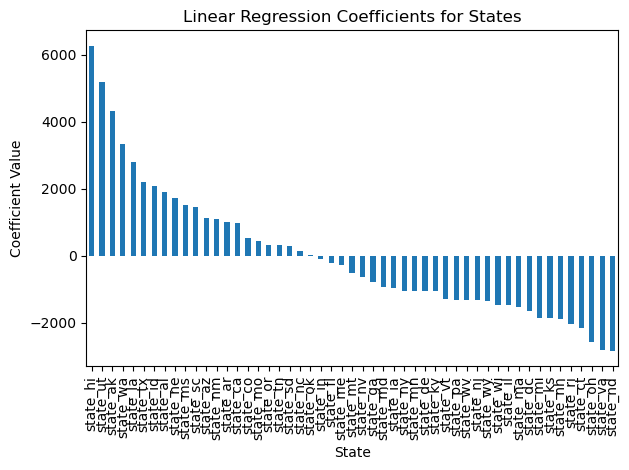

In [381]:
# Graph of Linear Regression Coefficients for States

state_coefs = Lr_df.filter(like='state_').T
state_coefs.columns = ['Coefficient']

state_coefs_sorted = state_coefs.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 8))
state_coefs_sorted.plot(kind='bar', legend=False)
plt.title('Linear Regression Coefficients for States')
plt.ylabel('Coefficient Value')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

<Figure size 1000x800 with 0 Axes>

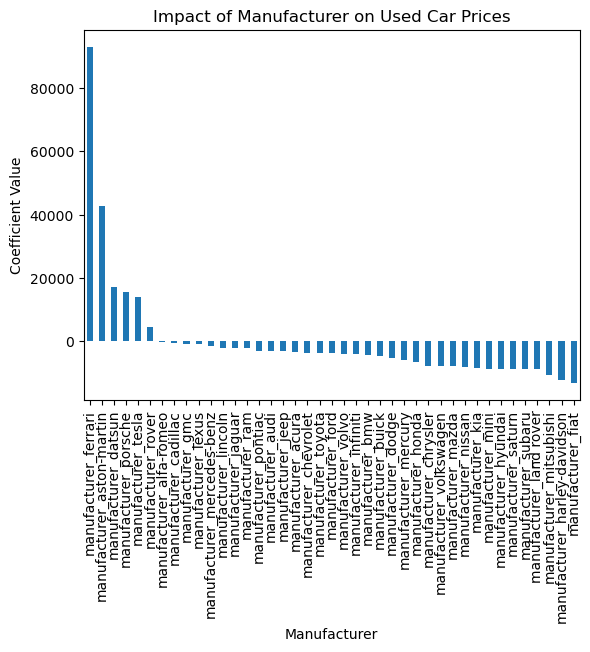

In [385]:
# Graph of Linear Regression Coefficients for Manufacturers

manufacturer_coeffs = Lr_df.filter(like='manufacturer_').T
manufacturer_coeffs.columns = ['Coefficient']

manufacturer_coeffs_sorted = manufacturer_coeffs.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
manufacturer_coeffs_sorted.plot(kind='bar', legend=False)
plt.title('Impact of Manufacturer on Used Car Prices')
plt.ylabel('Coefficient Value')
plt.xlabel('Manufacturer')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x800 with 0 Axes>

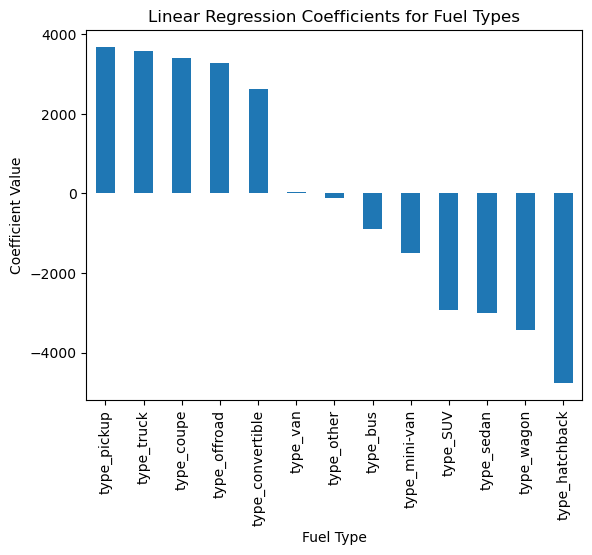

In [418]:
# Graph of Linear Regression Coefficients for car types

fuel_coeffs = Lr_df.filter(like='type_').T
fuel_coeffs.columns = ['Coefficient']
fuel_coeffs_sorted = fuel_coeffs.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
fuel_coeffs_sorted.plot(kind='bar', legend=False)
plt.title('Linear Regression Coefficients for Fuel Types')
plt.ylabel('Coefficient Value')
plt.xlabel('Fuel Type')
plt.xticks(rotation=90)
plt.show()

<Figure size 1000x800 with 0 Axes>

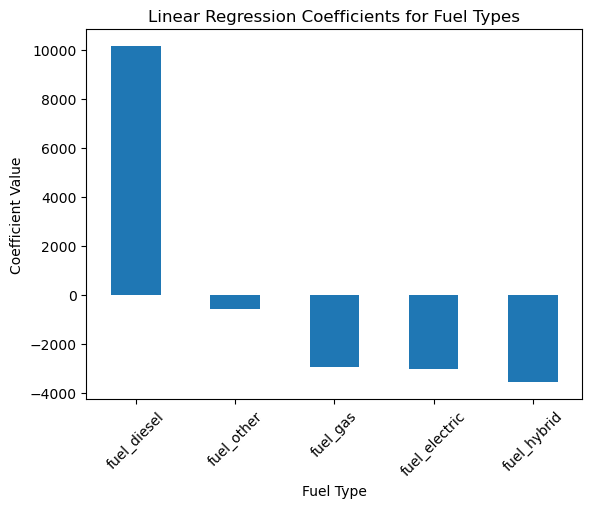

In [416]:
# Graph of Linear Regression Coefficients for fuel types

fuel_coeffs = Lr_df.filter(like='fuel_').T
fuel_coeffs.columns = ['Coefficient']
fuel_coeffs_sorted = fuel_coeffs.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
fuel_coeffs_sorted.plot(kind='bar', legend=False)
plt.title('Linear Regression Coefficients for Fuel Types')
plt.ylabel('Coefficient Value')
plt.xlabel('Fuel Type')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x800 with 0 Axes>

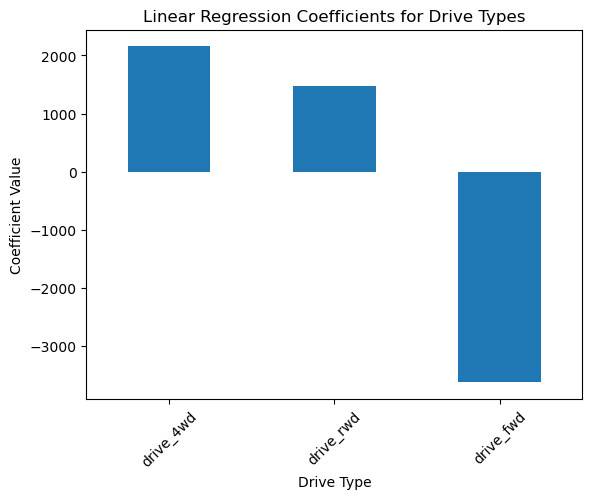

In [423]:
# Graph of Linear Regression Coefficients for drive

fuel_coeffs = Lr_df.filter(like='drive_').T
fuel_coeffs.columns = ['Coefficient']
fuel_coeffs_sorted = fuel_coeffs.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 8))
fuel_coeffs_sorted.plot(kind='bar', legend=False)
plt.title('Linear Regression Coefficients for Drive Types')
plt.ylabel('Coefficient Value')
plt.xlabel('Drive Type')
plt.xticks(rotation=45)
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### Recommendations

Here are data-driven insights that car dealerships can use to make strategic decisions on inventory acquisition, pricing strategies, and targeted marketing to optimize their profitability in the competitive used car market:

- The analysis suggests that states like Hawaii, Utah, Alaska, Washington, and Louisiana consistently offer the highest resale values for used cars, contrasting with Rhode Island, Connecticut, Ohio, Virginia, and North Dakota, which exhibit the lowest. Dealerships can capitalize on this by strategically purchasing vehicles in lower-value markets and selling them in higher-value ones to maximize profit margins.

- Vehicles with salvage titles, on average, see a reduction in value by approximately $3,794. This insight opens an opportunity for dealerships to acquire salvage vehicles at prices significantly below this amount, refurbish them if feasible, and sell them to achieve substantial profit margins, provided the costs of repair and refurbishment justify the investment.

- Diesel vehicles have a premium of about $13,000 over their gasoline counterparts. This significant difference suggests that acquiring diesel models at a price difference less than $13,000 compared to equivalent gasoline models presents a lucrative opportunity for dealerships to enhance profits, particularly if market demand supports higher pricing for diesel options.

- Despite manual transmissions being generally less costly to manufacture than automatic ones, the model indicates a consumer willingness to pay a premium for used cars equipped with manual transmissions. Although the overall demand for manual transmission vehicles might be lower, targeting the niche market of enthusiasts and buyers with a preference for manuals could lead to higher profit margins on these sales.